In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [2]:
train_df.head(5)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


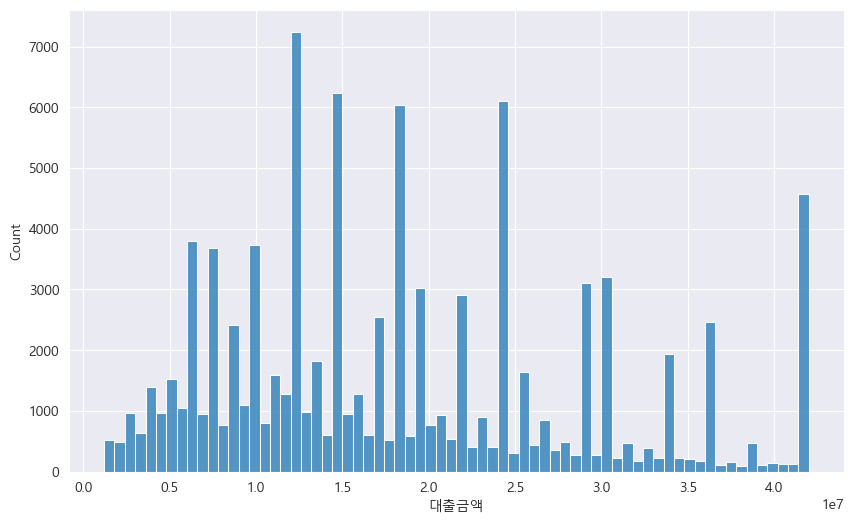

In [4]:
plt.rcParams["figure.figsize"] = (10,6)
sns.histplot(train_df['대출금액'])
plt.show()

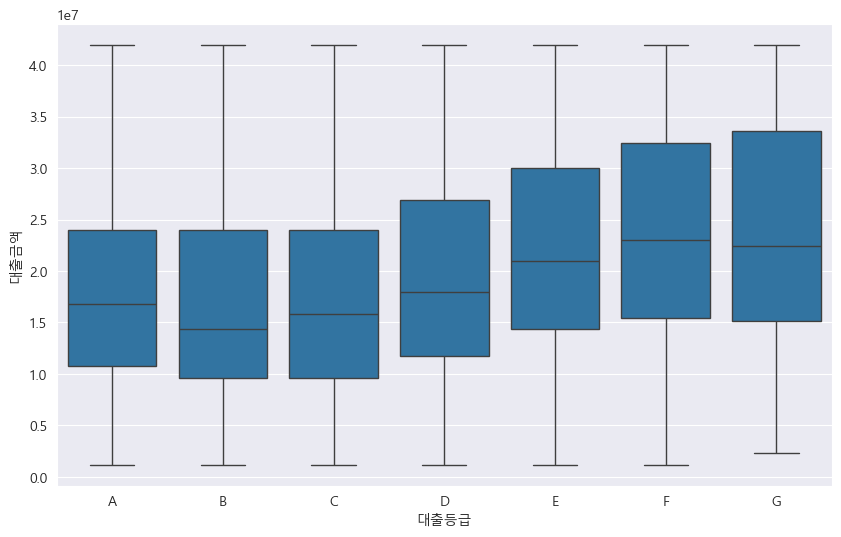

In [5]:
plt.rcParams["figure.figsize"] = (10,6)
sns.boxplot(x = train_df['대출등급'], y = train_df['대출금액'],
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

In [6]:
train_df['대출기간'].value_counts()

대출기간
 36 months    64479
 60 months    31815
Name: count, dtype: int64

<Axes: xlabel='대출등급', ylabel='count'>

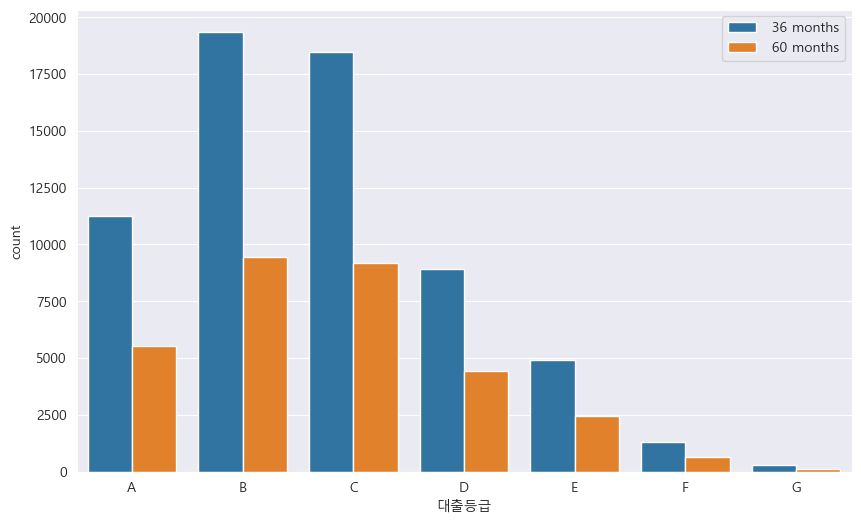

In [7]:
plt.rcParams["figure.figsize"] = (10,6)
sns.countplot(x=train_df['대출등급'], hue=sorted(train_df['대출기간']),
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [8]:
train_df['근로기간'].value_counts()

근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

In [9]:
def work_year_check(s):
    if s in ['< 1 year', '<1 year', '< 1 years']:
        return '0'
    elif s in ['10+years', '10+ years']:
        return '10'
    elif s == 'Unknown':
        return '0'
    else:
        return str(s[0])

In [10]:
train_df['근로기간'] = train_df['근로기간'].apply(lambda x : int(work_year_check(x)))
test_df['근로기간'] = test_df['근로기간'].apply(lambda x : int(work_year_check(x)))

In [11]:
train_df['근로기간'].value_counts()

근로기간
10    32481
0     13815
2      8450
3      7670
1      6305
5      5665
4      5588
8      4888
6      3874
7      3814
9      3744
Name: count, dtype: int64

<Axes: xlabel='대출등급', ylabel='count'>

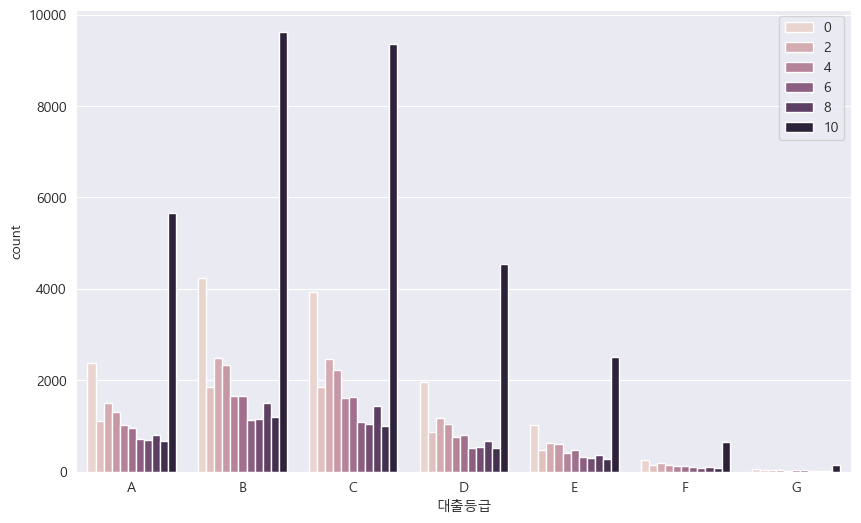

In [12]:
plt.rcParams["figure.figsize"] = (10,6)
sns.countplot(x=train_df['대출등급'], hue=sorted(train_df['근로기간']),
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [13]:
train_df['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64

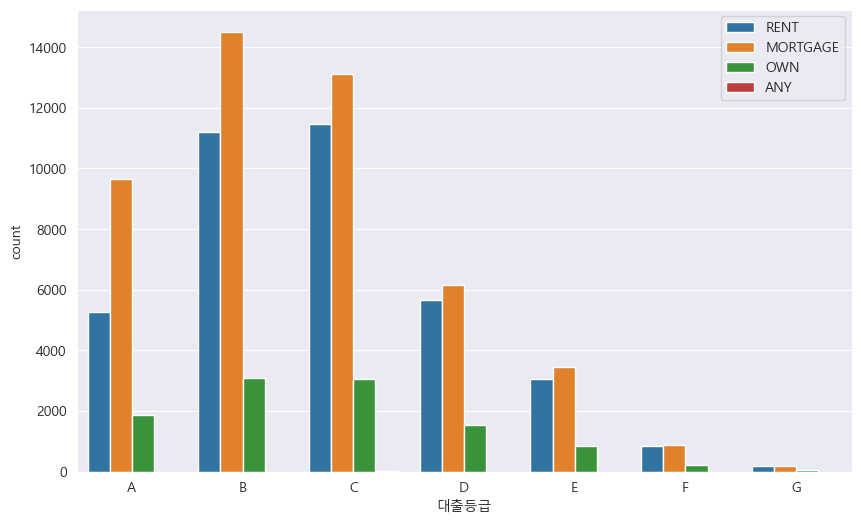

In [14]:
plt.rcParams["figure.figsize"] = (10,6)
sns.countplot(x='대출등급', hue='주택소유상태', data=train_df,
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.legend(loc = 'upper right')
plt.show()

<Axes: ylabel='연간소득'>

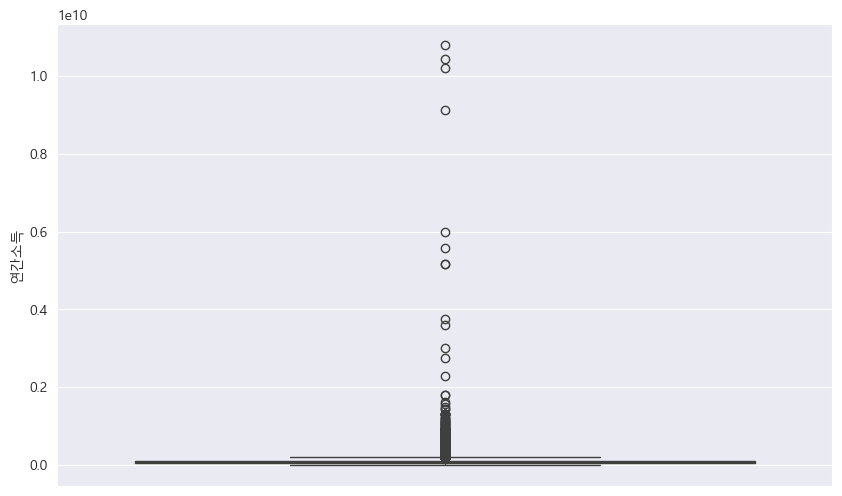

In [15]:
sns.boxplot(train_df['연간소득'])

In [16]:
train_df.loc[train_df['연간소득'] > 8000000000]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12448,TRAIN_12448,12000000,36 months,3,MORTGAGE,9120000000,0.09,27,주택 개선,10,12000000,192312.0,0.0,0.0,A
38340,TRAIN_38340,14400000,36 months,10,MORTGAGE,10200025200,0.22,21,신용 카드,0,349020,99036.0,0.0,0.0,B
60715,TRAIN_60715,13200000,36 months,10,MORTGAGE,10800000000,0.08,29,부채 통합,0,331128,70740.0,0.0,0.0,A
86424,TRAIN_86424,16800000,60 months,10,MORTGAGE,10440000000,0.18,32,부채 통합,0,213312,129096.0,0.0,0.0,B


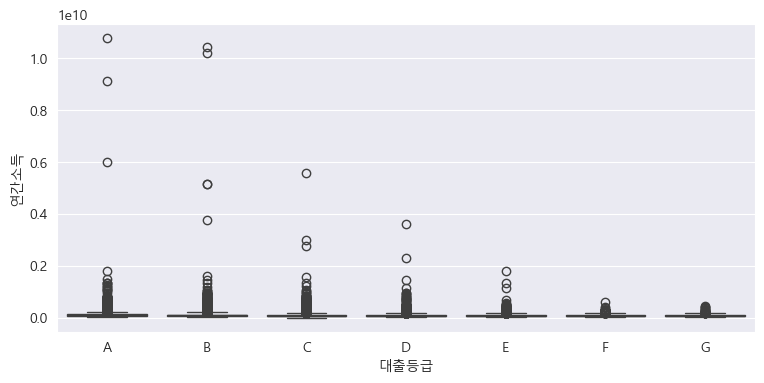

In [18]:
plt.rcParams["figure.figsize"] = (9,4)
sns.boxplot(x = '대출등급', y = '연간소득', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

<Axes: ylabel='총계좌수'>

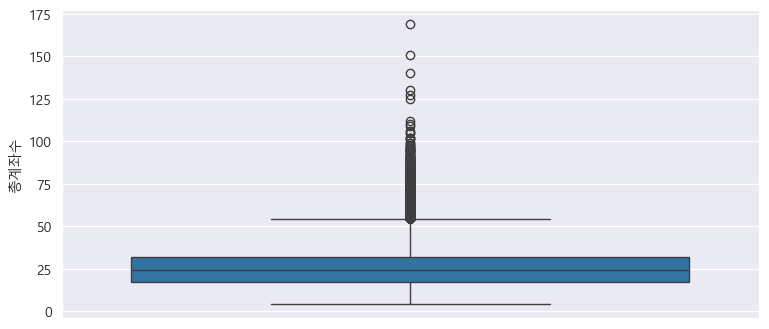

In [19]:
sns.boxplot(train_df['총계좌수'])

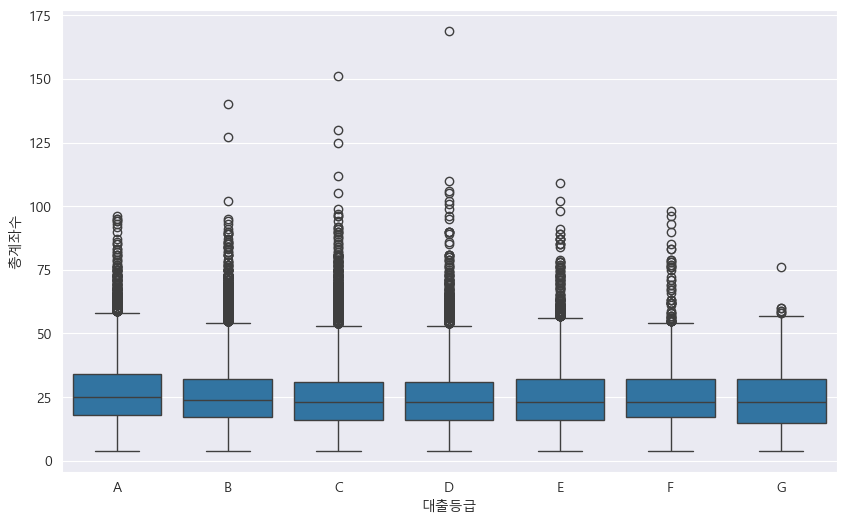

In [20]:
plt.rcParams["figure.figsize"] = (10,6)
sns.boxplot(x = '대출등급', y = '총계좌수', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

In [21]:
train_df['대출목적'].value_counts()

대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64

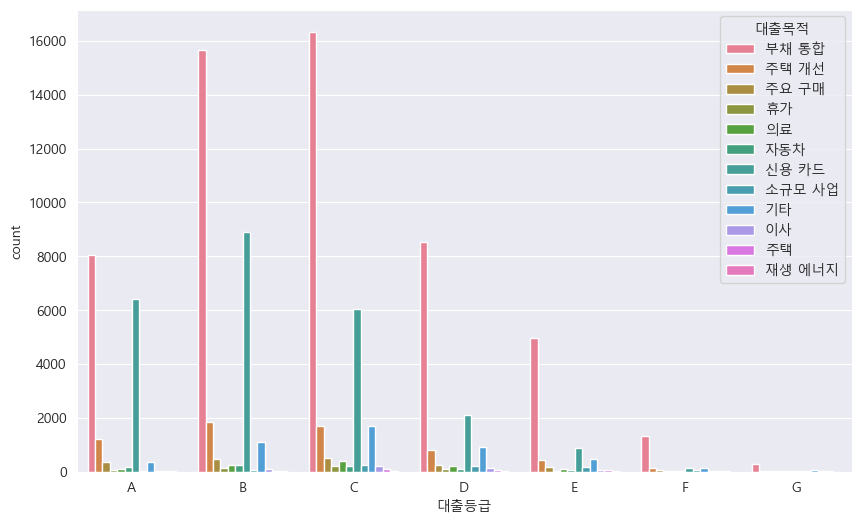

In [22]:
plt.rcParams["figure.figsize"] = (10,6)
sns.countplot(x='대출등급', hue='대출목적', data=train_df,
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

<Axes: ylabel='최근_2년간_연체_횟수'>

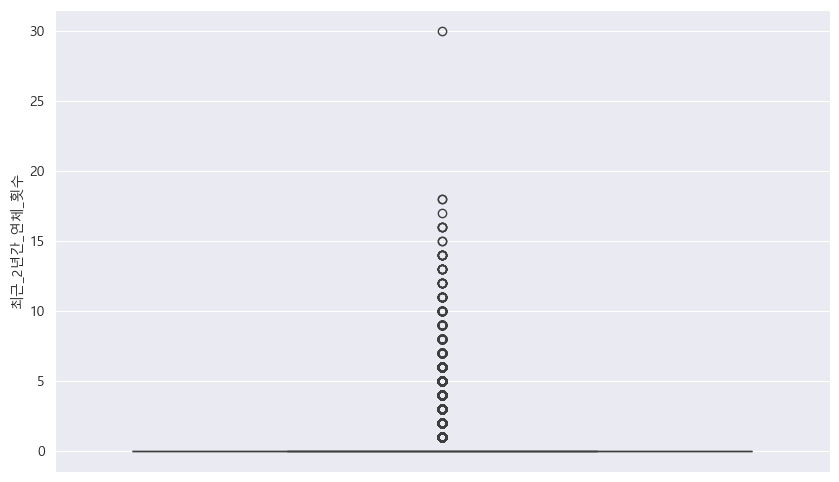

In [25]:
sns.boxplot(train_df['최근_2년간_연체_횟수'])

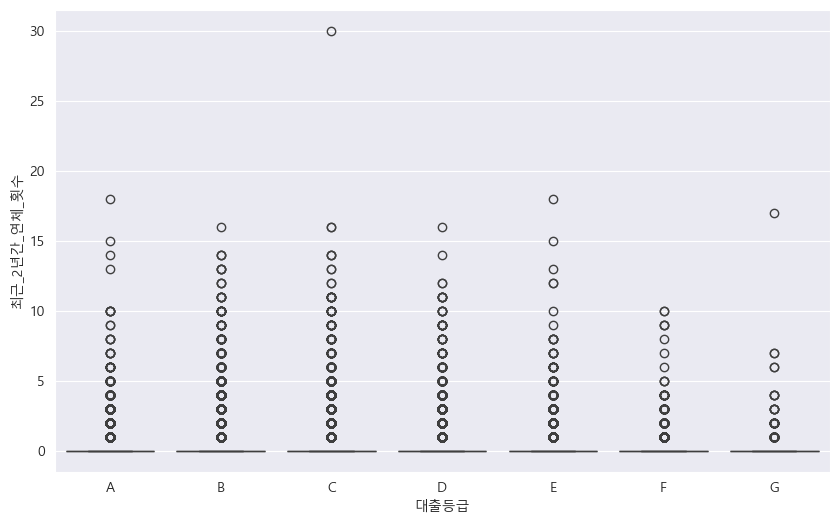

In [26]:
plt.rcParams["figure.figsize"] = (10,6)
sns.boxplot(x = '대출등급', y = '최근_2년간_연체_횟수', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

<Axes: ylabel='총상환원금'>

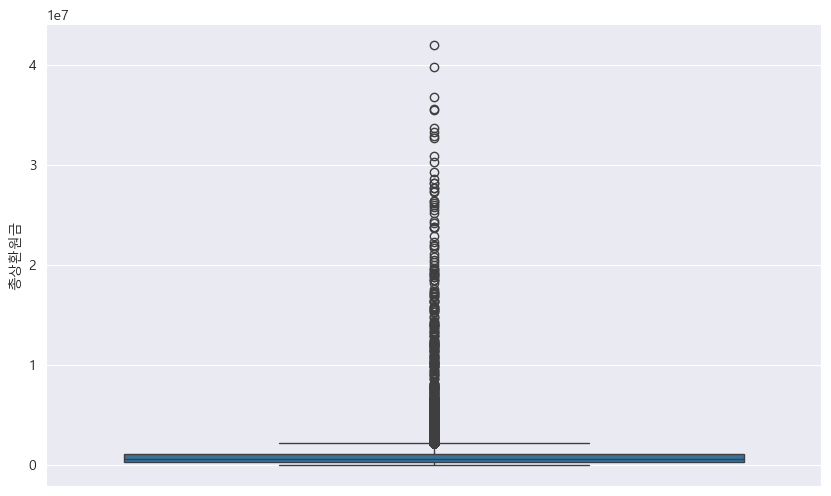

In [27]:
sns.boxplot(train_df['총상환원금'])

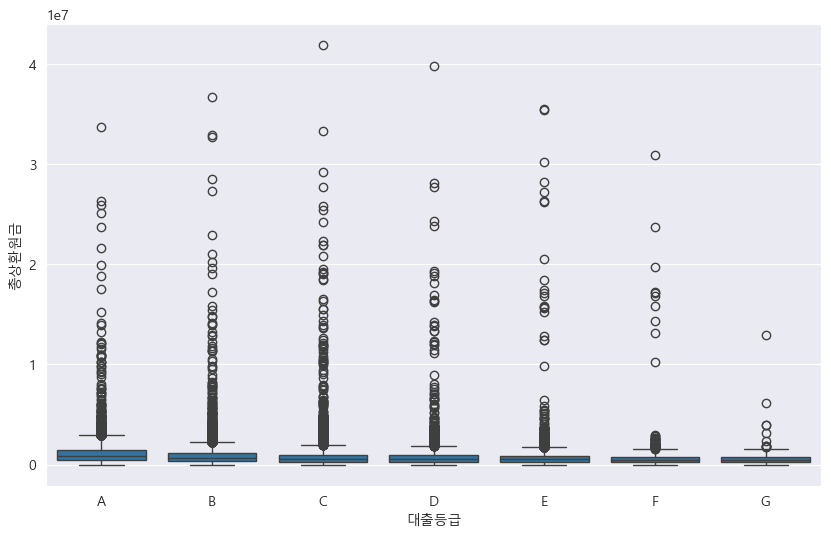

In [28]:
plt.rcParams["figure.figsize"] = (10,6)
sns.boxplot(x = '대출등급', y = '총상환원금', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

<Axes: ylabel='총상환이자'>

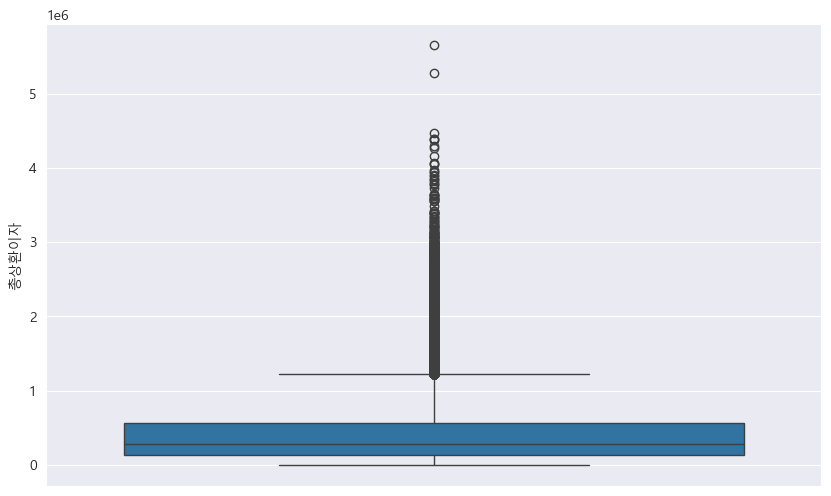

In [29]:
sns.boxplot(train_df['총상환이자'])

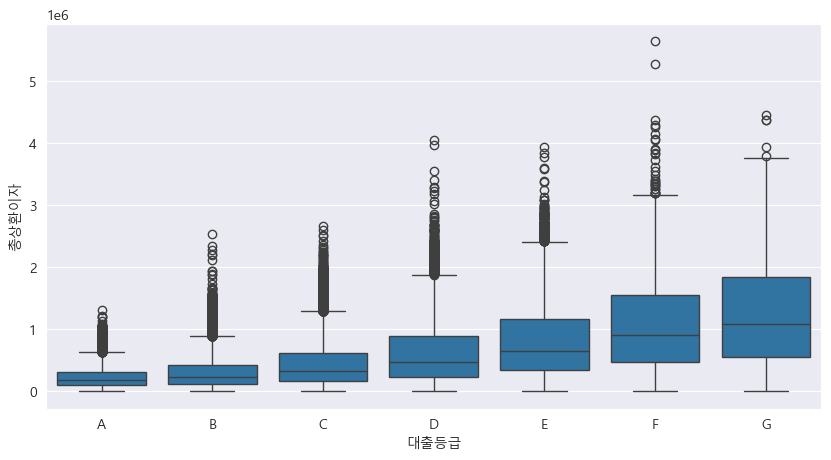

In [31]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x = '대출등급', y = '총상환이자', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

<Axes: ylabel='총연체금액'>

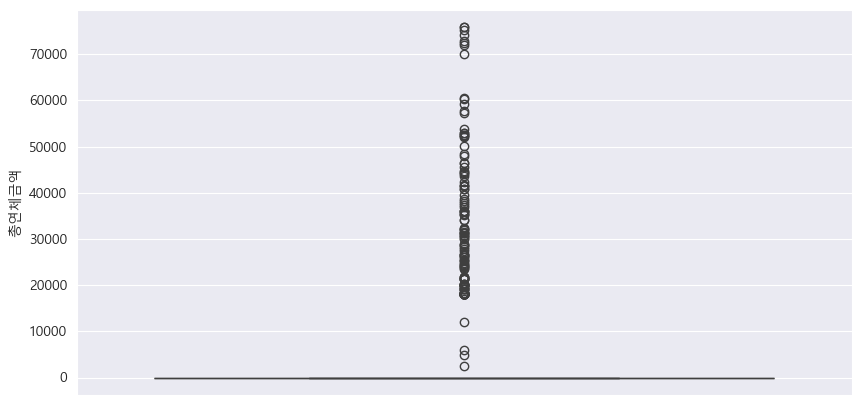

In [32]:
sns.boxplot(train_df['총연체금액'])

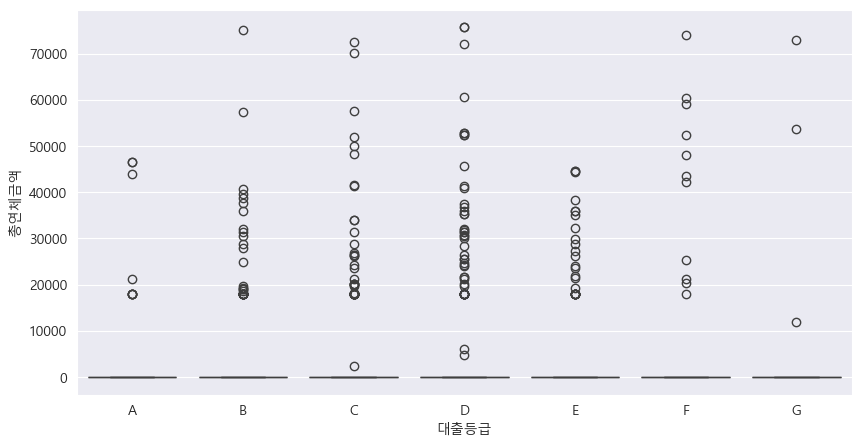

In [34]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x = '대출등급', y = '총연체금액', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

<Axes: ylabel='연체계좌수'>

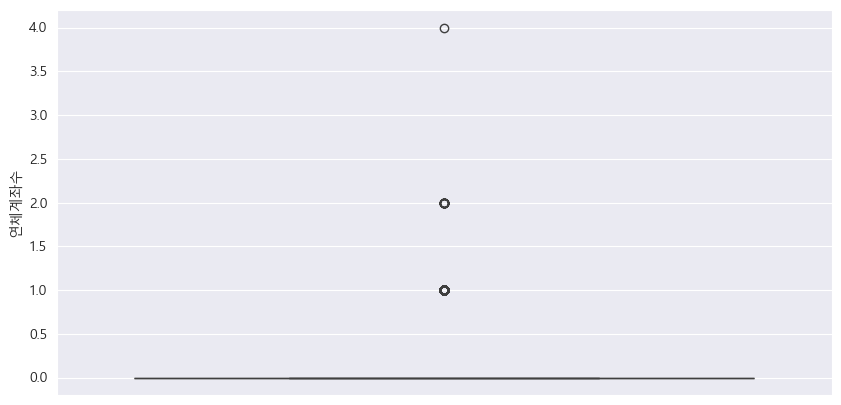

In [35]:
sns.boxplot(train_df['연체계좌수'])

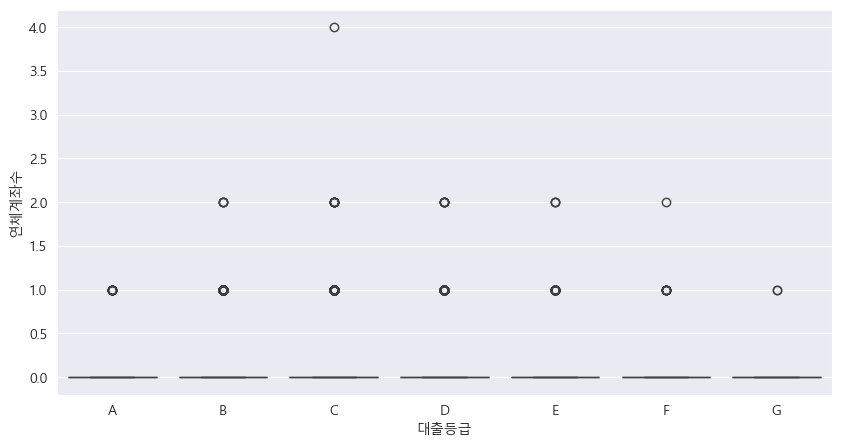

In [37]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x = '대출등급', y = '연체계좌수', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

In [38]:
train_df['대출등급'].value_counts()

대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

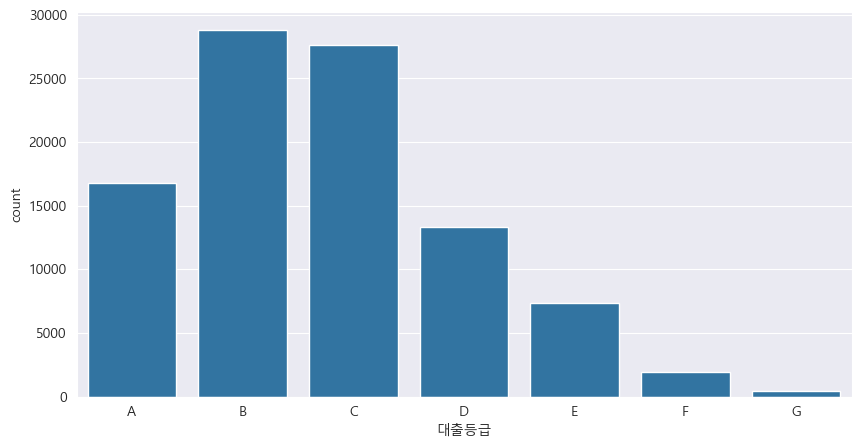

In [40]:
plt.rcParams["figure.figsize"] = (10,5)
sns.countplot(x='대출등급', data=train_df,
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

In [59]:
train_df

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,is_rent,is_mort,is_own,is_부채통합,is_주택개선,is_신용카드,is_그외목적
0,12480000,0,6,72000000,18.90,15,0,0,0.0,0.0,0.0,C,1,0,0,1,0,0,0
1,14400000,0,10,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B,0,1,0,0,1,0,0
2,12000000,0,5,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A,0,1,0,1,0,0,0
3,14400000,0,8,132000000,15.09,15,0,325824,153108.0,0.0,0.0,C,0,1,0,1,0,0,0
4,18000000,0,0,71736000,25.39,19,0,228540,148956.0,0.0,0.0,B,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,0,10,210000000,9.33,33,0,974580,492168.0,0.0,0.0,C,0,1,0,0,0,1,0
96290,28800000,0,10,132000000,5.16,25,0,583728,855084.0,0.0,0.0,E,0,1,0,0,1,0,0
96291,14400000,0,1,84000000,11.24,22,0,1489128,241236.0,0.0,0.0,A,0,1,0,0,0,1,0
96292,15600000,0,5,66330000,17.30,21,2,1378368,818076.0,0.0,0.0,D,0,1,0,1,0,0,0


In [80]:
import pandas as pd

data = {
    '대출기간': [' 36 months', ' 60 months', ' 24 months', ' 48 months'],
    '주택소유상태': ['RENT', 'MORTGAGE', 'OWN', 'RENT'],
    '대출목적': ['부채 통합', '주택 개선', '신용 카드', '부채 통합']
}

train_df = pd.DataFrame(data)

# 대출기간 맨 처음에 공백이 들어가있습니다.
train_df['대출기간'] = train_df['대출기간'].astype(str).apply(lambda x: int(x.split(" ")[1])/12)
# 주택소유상태를 이진 변수로 변환
train_df['is_rent'] = train_df['주택소유상태'].apply(lambda x: 1 if x == 'RENT' else 0)
train_df['is_mort'] = train_df['주택소유상태'].apply(lambda x: 1 if x == 'MORTGAGE' else 0)
train_df['is_own'] = train_df['주택소유상태'].apply(lambda x: 1 if x == 'OWN' else 0)
# 대출목적을 이진 변수로 변환
train_df['is_부채통합'] = train_df['대출목적'].apply(lambda x: 1 if x == '부채 통합' else 0)
train_df['is_주택개선'] = train_df['대출목적'].apply(lambda x: 1 if x in ['주택 개선', '주택'] else 0)
train_df['is_신용카드'] = train_df['대출목적'].apply(lambda x: 1 if x == '신용 카드' else 0)
train_df['is_그외목적'] = train_df['대출목적'].apply(lambda x: 1 if x not in ['부채 통합', '주택 개선', '신용 카드'] else 0)

# 불필요한 변수 제거
train_df = train_df.drop(['주택소유상태', '대출목적'], axis=1)

In [71]:
train_df.head(5)

,대출기간,is_rent,is_mort,is_own,is_부채통합,is_주택개선,is_신용카드,is_그외목적
0,3.0,1,0,0,1,0,0,0
1,5.0,0,1,0,0,1,0,0
2,2.0,0,0,1,0,0,1,0
3,4.0,1,0,0,1,0,0,0


In [72]:
test_df['대출기간'] = test_df['대출기간'].apply(lambda x: int(list(x.split(" "))[1])/12)
test_df['is_rent'] = test_df['주택소유상태'].apply(lambda x: 1 if x == 'RENT' else 0)
test_df['is_mort'] = test_df['주택소유상태'].apply(lambda x: 1 if x == 'MORTGAGE' else 0)
test_df['is_own'] = test_df['주택소유상태'].apply(lambda x: 1 if x == 'OWN' else 0)
test_df['is_부채통합'] = test_df['대출목적'].apply(lambda x: 1 if x == '부채 통합' else 0)
test_df['is_주택개선'] = test_df['대출목적'].apply(lambda x: 1 if x in ['주택 개선', '주택'] else 0)
test_df['is_신용카드'] = test_df['대출목적'].apply(lambda x: 1 if x == '신용 카드' else 0)
test_df['is_그외목적'] = test_df['대출목적'].apply(lambda x: 1 if x not in ['부채 통합', '주택 개선', '신용 카드', '주택'] else 0)

# 0-1으로 수동으로 변환시킨 변수들도 우선 제거
test_df = test_df.drop(['ID', '주택소유상태', '대출목적'], axis = 1)

In [73]:
train_df_corr = train_df.copy()

In [76]:
# 고등급부터 저등급을 6~0으로 매기겠습니다. 수치형이되어야 관계를 보기 좋으니까요.
def get_grade_to_num(x):
    if x == 'A': return 6
    if x == 'B': return 5
    if x == 'C': return 4
    if x == 'D': return 3
    if x == 'E': return 2
    if x == 'F': return 1
    if x == 'G': return 0

# '대출등급' 컬럼이 실제로 존재하는지 확인
if '대출등급' in train_df_corr.columns:
    train_df_corr['grade'] = train_df_corr['대출등급'].apply(lambda x: get_grade_to_num(x))
    train_df_corr = train_df_corr.drop(['대출등급'], axis=1)
else:
    print("대출등급 컬럼이 존재하지 않습니다.")

대출등급 컬럼이 존재하지 않습니다.


In [77]:
train_df_corr

,대출기간,is_rent,is_mort,is_own,is_부채통합,is_주택개선,is_신용카드,is_그외목적
0,3.0,1,0,0,1,0,0,0
1,5.0,0,1,0,0,1,0,0
2,2.0,0,0,1,0,0,1,0
3,4.0,1,0,0,1,0,0,0


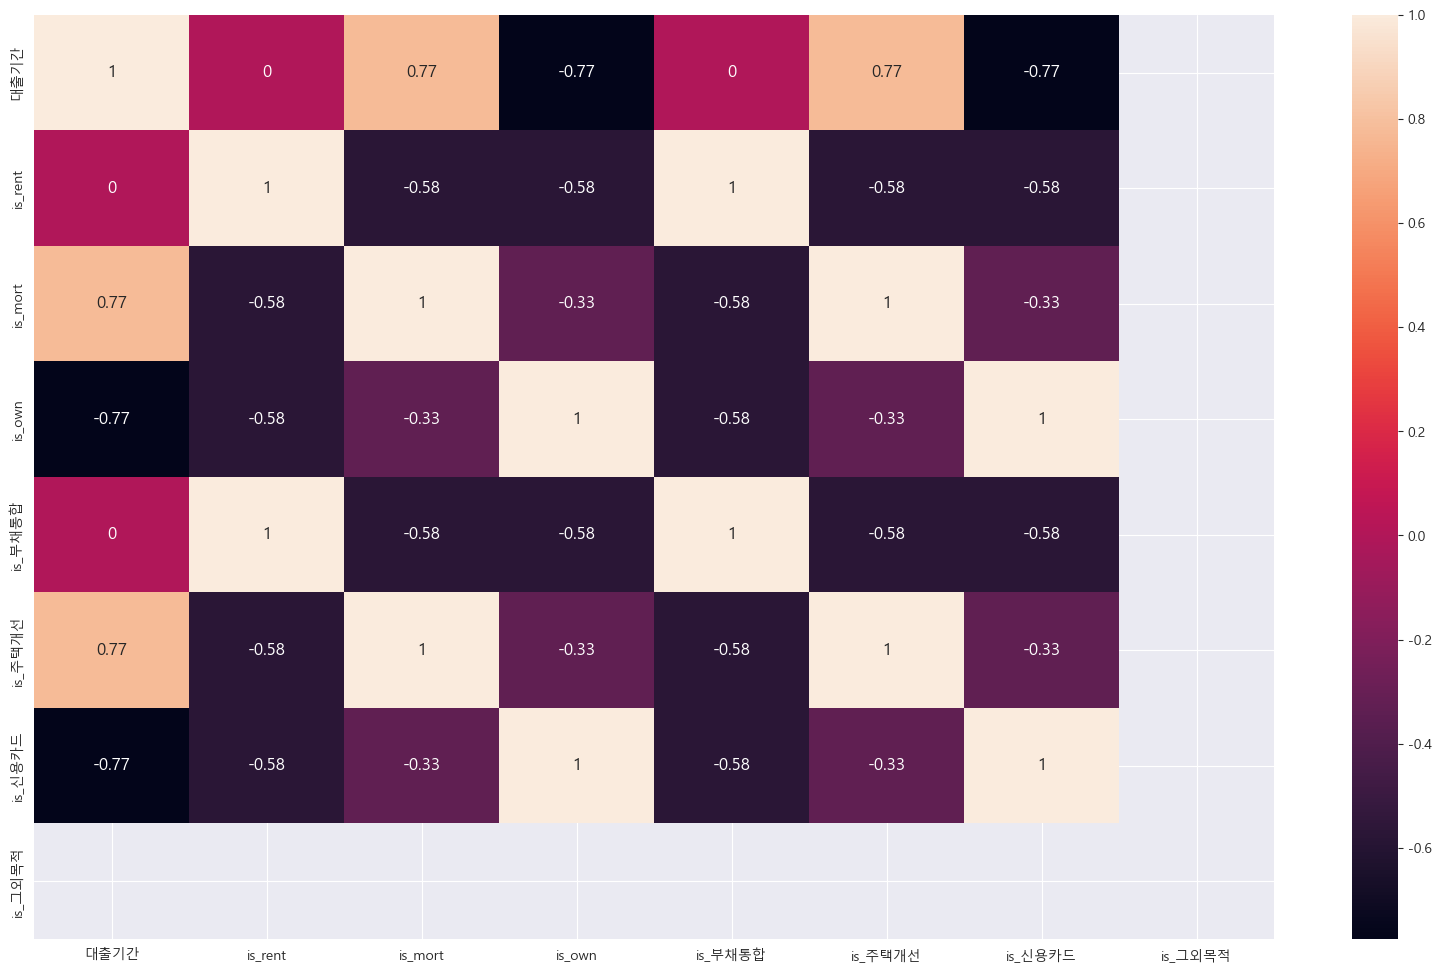

In [82]:
plt.rcParams["figure.figsize"] = (20,12)
sns.heatmap(train_df_corr.corr(), annot = True, annot_kws={"size": 12})
plt.rc('axes', labelsize=36)
plt.show()